<a href="https://colab.research.google.com/github/prunojumah/IP_WEEK6_SUBMISSION/blob/master/WEEK6_MORINGA_SCHOOL_INDEPENDENT_PROJECT_PRUNO_JUMAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

Tasked with making a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (including rank in the training).

Polynomial approach will be used

The metrics of success is the successful prediction of the results of two random teams i.e predicting the correct results for both the home team and away team.

The available data is appropriate in answering the research question since it gives insights on how the teams were perfoming previously which can in turn be used to make future outcome predictions.

In [769]:
# Pandas
import pandas as pd

# Numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# Ipython tool for figsize
from IPython.core.pylabtools import figsize

# train test split
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# cross_val_score
from sklearn.model_selection import cross_val_score

# DataframeMapper, CategoricalImputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer

# FeatureUnion
from sklearn.pipeline import FeatureUnion

# Function Transformer
from sklearn.preprocessing import FunctionTransformer


# DATA PREPARATION AND LOADING OF DATA

In this section, we load the data, inspect missing values, convert data type, convert target to numerical

In [770]:
results = pd.read_csv('/content/results.csv')
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


**Explanations to the columns have been given below**

Rank

Country Abbreviation

Total Points

Previous Points

Rank Change

Average Previous Years 

Average Previous Years Points Weighted (50%)

Average 2 Years Ago Points

Average 2 Years Ago Points Weighted (30%)

Average 3 Years Ago Points

Average 3 Years Ago Points Weighted (20%)

Confederation

Date - date of the match

Home_team - the name of the home team

Away_team - the name of the away team

Home_score - full-time home team score including extra time, not including penalty-shootouts

Away_score - full-time away team score including extra time, not including penalty-shootouts

Tournament - the name of the tournament

City - the name of the city/town/administrative unit where the match was played

Country - the name of the country where the match was played

Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

In [771]:
fifa = pd.read_csv('/content/fifa_ranking.csv')
fifa

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


DATA CLEANING

In [772]:
# Enhancing uniformity in the date column

results.date = results.date.apply(lambda x: x.replace('/', '-'))
fifa.rank_date = fifa.rank_date.apply(lambda x: x.replace('/', '-'))

fifa.rank_date = pd.to_datetime(fifa.rank_date)
results.date = pd.to_datetime(results.date)


In [773]:
# separating the year and the month columns

fifa['year'] = fifa.rank_date.dt.year
results['year'] = results.date.dt.year
fifa['month'] = fifa.rank_date.dt.month
results['month'] = ranking.date.dt.month

In [774]:
# Merging the two tables on the year and month columns.

df = pd.merge(results, fifa, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [775]:
#obtaining a sub table of the home country records

homedf= df[df.home_team == df.country_full]

homedf.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
18192,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
18291,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,Ghana,GHA,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18479,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18747,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,Mauritania,MTN,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18838,1994-01-11,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,False,1994,4,69.0,Thailand,THA,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,1994-04-19


In [776]:
#obtaining a subtable of the away country match entries

awaydf = df[df.away_team == df.country_full]

awaydf.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
18224,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
18286,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18532,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18648,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18774,1994-01-11,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,False,1994,4,5.0,Nigeria,NGA,0.0,49.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19


In [777]:
# Merging the home games data with the away games data to come up with a new dataframe
# The merging is done on columns year, month, home team and away team.

final = pd.merge(homedf, awaydf, how = 'left' , left_on =['year', 'month', 'home_team', 'away_team'],right_on = ['year', 'month', 'home_team', 'away_team'])

final.head()

,date_x,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,year,month,rank_x,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,date_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y,rank_y,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19,1994-01-02,0.0,0.0,Friendly,Bridgetown,Barbados,False,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19,1994-01-27,3.0,2.0,CFU Caribbean Cup qualification,Bridgetown,Barbados,False,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,Ghana,GHA,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,1994-01-02,2.0,1.0,Friendly,Accra,Ghana,False,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,1994-01-05,1.0,1.0,Friendly,Bamako,Mali,False,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,Mauritania,MTN,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,1994-01-09,1.0,3.0,Friendly,Nouakchott,Mauritania,False,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19


In [778]:
# Checking the shape of the resulting dataframe

final.shape

(20578, 50)

In [779]:
# Checking for missing values

final.isnull().sum()

date_x                          0
home_team                       0
away_team                       0
home_score_x                    0
away_score_x                    0
tournament_x                    0
city_x                          0
country_x                       0
neutral_x                       0
year                            0
month                           0
rank_x                          0
country_full_x                  0
country_abrv_x                  0
total_points_x                  0
previous_points_x               0
rank_change_x                   0
cur_year_avg_x                  0
cur_year_avg_weighted_x         0
last_year_avg_x                 0
last_year_avg_weighted_x        0
two_year_ago_avg_x              0
two_year_ago_weighted_x         0
three_year_ago_avg_x            0
three_year_ago_weighted_x       0
confederation_x                 0
rank_date_x                     0
date_y                       1811
home_score_y                 1811
away_score_y  

In [780]:
# Dropping the missing values

final.dropna(inplace=True)
finaldf = final.copy()
finaldf.shape

(18767, 50)

In [781]:
# Checking if the column data types are okay

finaldf.dtypes

date_x                       datetime64[ns]
home_team                            object
away_team                            object
home_score_x                          int64
away_score_x                          int64
tournament_x                         object
city_x                               object
country_x                            object
neutral_x                              bool
year                                  int64
month                                 int64
rank_x                              float64
country_full_x                       object
country_abrv_x                       object
total_points_x                      float64
previous_points_x                   float64
rank_change_x                       float64
cur_year_avg_x                      float64
cur_year_avg_weighted_x             float64
last_year_avg_x                     float64
last_year_avg_weighted_x            float64
two_year_ago_avg_x                  float64
two_year_ago_weighted_x         

In [782]:
# Creating a new column which will store the match outcome
# home score - away score (the column is with respect to the home team)
# Thereby giving an allowance of negative values to be obtained
# zero = draw
# Positive integer =  home team won
# Negative intefer =  away team won

finaldf['score'] = finaldf.home_score_x - finaldf.away_score_x

In [783]:
#Previewing the resulting table

finaldf.score.head()

0    0
1    0
2    1
3    0
4   -2
Name: score, dtype: int64

In [784]:
#defining a function to calculate the match outcome

def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'

finaldf['result'] = finaldf.score.apply(lambda x: result(x))
finaldf['result'] 

0        Draw
1        Draw
2         Win
3        Draw
4        Lose
         ... 
20572     Win
20573    Lose
20575    Lose
20576    Draw
20577    Draw
Name: result, Length: 18767, dtype: object

In [785]:
# Previewing the final dataframe after new columns have been added

fifa = finaldf[['home_team', 'home_score_x', 'away_score_x' ,'away_team', 'tournament_x', 'year', 'rank_x', 'rank_y', 'result']]

fifa.head()

,home_team,home_score_x,away_score_x,away_team,tournament_x,year,rank_x,rank_y,result
0,Barbados,0,0,Grenada,Friendly,1994,99.0,131.0,Draw
1,Barbados,0,0,Grenada,Friendly,1994,99.0,131.0,Draw
2,Ghana,2,1,Egypt,Friendly,1994,29.0,24.0,Win
3,Mali,1,1,Burkina Faso,Friendly,1994,48.0,101.0,Draw
4,Mauritania,1,3,Mali,Friendly,1994,147.0,48.0,Lose


In [786]:
# Checking for the number of unique values in the tournament column

finaldf.tournament_x.nunique()

66

In [787]:
# Creating a new column to store the tournament type

def tourn_type(i):
  if i == 'FIFA World Cup':
    return 'FIFA World Cup'
  if i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

finaldf['tournament_type'] = finaldf.tournament_x.apply(lambda x: tourn_type(x))
print(finaldf['tournament_type'])


0        Friendly
1        Friendly
2        Friendly
3        Friendly
4        Friendly
           ...   
20572    Friendly
20573    Friendly
20575    Friendly
20576    Friendly
20577    Friendly
Name: tournament_type, Length: 18767, dtype: object


In [788]:
# converting to numerical data 

finaldf['rank_x'].astype(int)



0         99
1         99
2         29
3         48
4        147
        ... 
20572     61
20573    178
20575     15
20576     84
20577     24
Name: rank_x, Length: 18767, dtype: int64

# EXPLORATORY DATA ANALYSIS

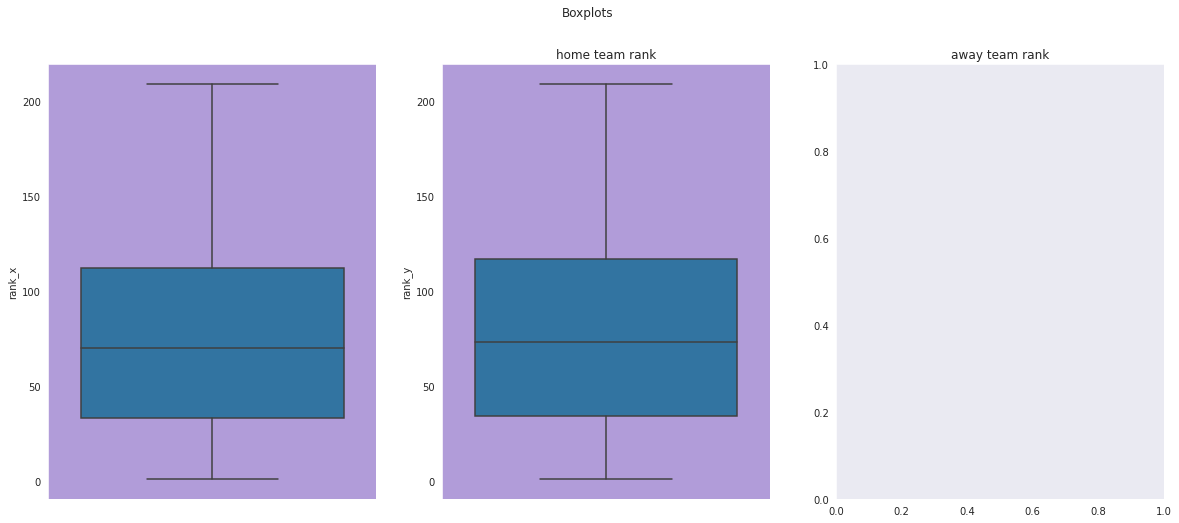

In [789]:
# Checking for outliers

import seaborn as sns

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=finaldf, y = "rank_x", ax=ax[0])
ax[1].set_title('home team rank')
sns.boxplot(data=finaldf, y = "rank_y", ax=ax[1])
ax[2].set_title('away team rank')
ax[0].set_facecolor('#b19cd9') 
ax[1].set_facecolor('#b19cd9') 

plt.show()

# Absence of outliers

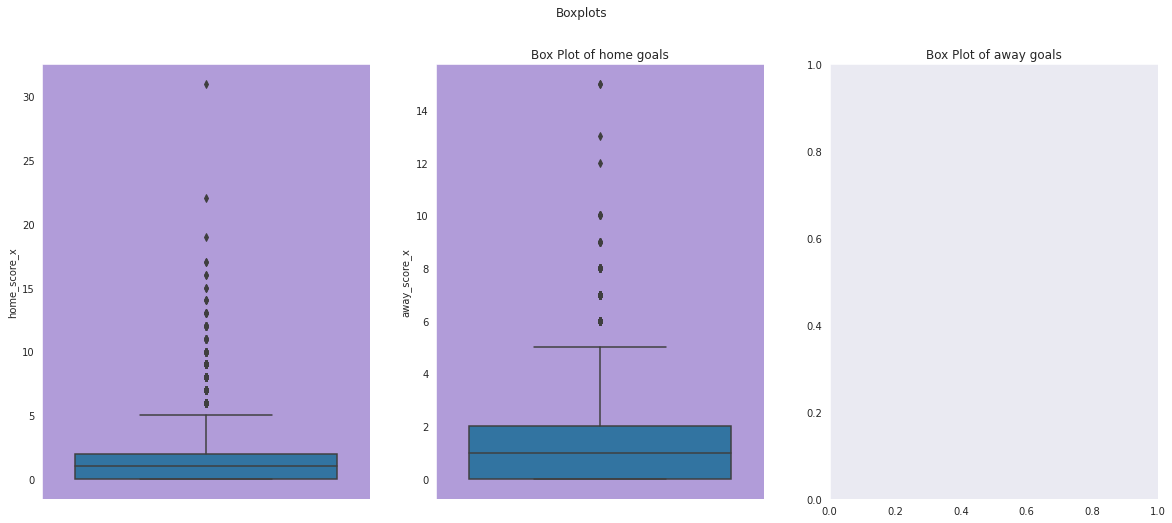

In [790]:
#Checking for outliers
import seaborn as sns

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=finaldf, y = "home_score_x", ax=ax[0])
ax[1].set_title('Box Plot of home goals')
sns.boxplot(data=finaldf, y = "away_score_x", ax=ax[1])
ax[2].set_title('Box Plot of away goals')
ax[1].set_facecolor('#b19cd9') 
ax[0].set_facecolor('#b19cd9') 

plt.show()

#Presence of outliers which will not be discarded in the analysis.

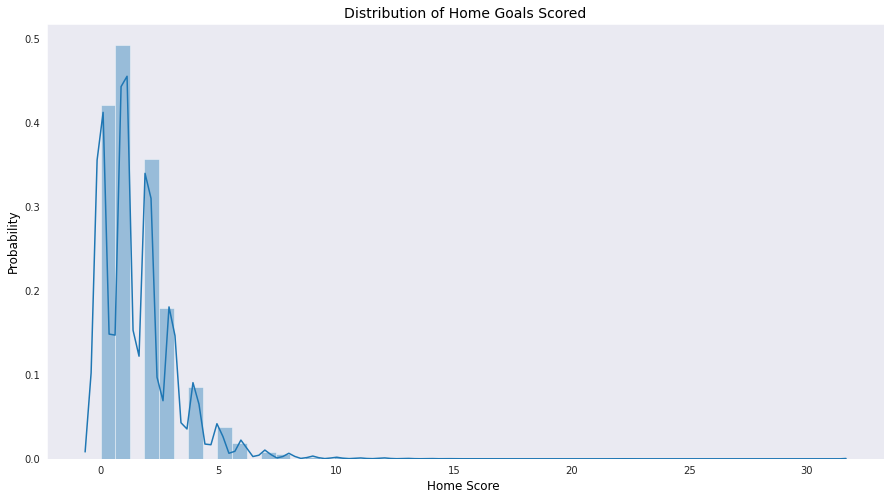

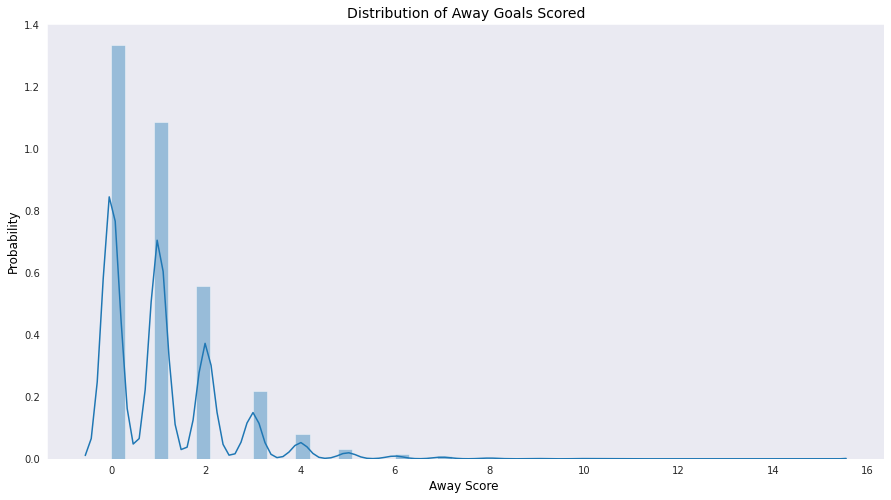

In [791]:
# Using the seaborn library to plot a histogram 

plt.subplots(figsize =  (15,8))
sns.distplot(finaldf.home_score_x,hist = True, norm_hist = True, bins = None)


plt.xlabel('Home Score ', color = 'black', fontsize =12)
plt.ylabel('Probability', color ='black', fontsize = 12)
plt.title('Distribution of Home Goals Scored', color = 'black', fontsize = 14)
plt.show()
print('\n')


plt.subplots(figsize =  (15,8))
sns.distplot(finaldf.away_score_x,hist = True,  bins = None)


plt.xlabel('Away Score ', color = 'black', fontsize =12)
plt.ylabel('Probability', color ='black', fontsize = 12)
plt.title('Distribution of Away Goals Scored', color = 'black', fontsize = 14)
plt.show()

#The histograms are skewed to the right which simply means
# that the mean is less than the median and the mode

Dealing with the categorical data

In [792]:
# encoding three categorical columns 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix

categorical_cols = ['neutral_x', 'tournament_type', 'result']

le = LabelEncoder()

finaldf[categorical_cols] = finaldf[categorical_cols].apply(lambda x: le.fit_transform(x))

finaldf[categorical_cols].head(10)

,neutral_x,tournament_type,result
0,0,1,0
1,0,1,0
2,0,1,2
3,0,1,0
4,0,1,1
5,0,1,0
7,1,1,0
8,1,1,0
9,0,1,0
11,0,1,0


In [793]:
# Finding the correlation between variables

fifa_corr = fifa.corr()
fifa_corr

,home_score_x,away_score_x,year,rank_x,rank_y
home_score_x,1.000000,-0.161261,-0.042178,-0.134452,0.314069
away_score_x,-0.161261,1.000000,-0.007613,0.212876,-0.184720
year,-0.042178,-0.007613,1.000000,0.090749,0.092325
rank_x,-0.134452,0.212876,0.090749,1.000000,0.481618
rank_y,0.314069,-0.184720,0.092325,0.481618,1.000000


In [794]:
# Using VIF to check for multicollinearity

vifdf = pd.DataFrame(np.linalg.inv(fifa_corr.values), index = fifa_corr.index, columns = fifa_corr.columns)
vifdf

,home_score_x,away_score_x,year,rank_x,rank_y
home_score_x,1.262556,-0.012758,0.068790,0.470541,-0.631859
away_score_x,-0.012758,1.180518,0.009749,-0.469276,0.447184
year,0.068790,0.009749,1.015283,-0.039424,-0.094553
rank_x,0.470541,-0.469276,-0.039424,1.663851,-1.032168
rank_y,-0.631859,0.447184,-0.094553,-1.032168,1.786892


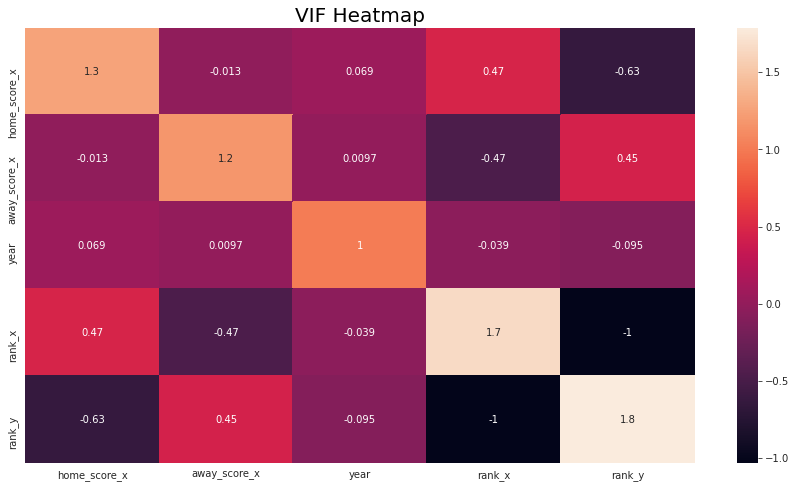

In [795]:
# A VIF heatmap to determine the correlation of the relevant variables

sns.set_style('dark')
plt.subplots(figsize =  (15,8))
sns.heatmap(vifdf, annot = True)
plt.title('VIF Heatmap', color = 'black', fontsize = 20)

plt.show()

# Implementation of the solution 
1. Logistics approach

The model will predict whether the home team will win, draw or lose


In [796]:
# Spliting the data into features and the target variable

X = fifa.drop('result', axis = 1)
y = fifa.result

# Encoding the categorical features

X = pd.get_dummies(X, drop_first=True)

# Spliting into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions

y_pred = logistic.predict(X_test)

# Measuring the accuracy of the model

print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')
print(f'The f1 score of the model is {f1_score(y_test, y_pred, average = "macro")}')
confusion_matrix(y_test, y_pred)

#The accuracy of the model is 89% which is quite commendable


The accuracy of the model is 0.894075021312873
The f1 score of the model is 0.8758161055026724


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 966,   49,  169],
       [ 234, 1021,    0],
       [  45,    0, 2208]])

In [797]:
fifa.dtypes

home_team        object
home_score_x      int64
away_score_x      int64
away_team        object
tournament_x     object
year              int64
rank_x          float64
rank_y          float64
result           object
dtype: object

2.   POLYNOMIAL MODEL



In [798]:
# Selectiong the columns to be used and encoding the categorical data

X = fifa.iloc[:, [0, 2, 3, 4, 5, 6, 7]]
y = fifa.home_score_x
# Encoding of the categorical variable
X = pd.get_dummies(X, drop_first=True)
# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)
# Standardising of the the X_train and the X_test 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the model
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))



1.3096366518463611


The accuracy of the model is 1.309 which is close to 1 imolying that the model is reliable.

The lower the RMSE the better the perfomance of the model.

## Hyperparameter tuning

In [ ]:
from sklearn.linear_model import LinearRegression
LinearRegression()

In [800]:
from sklearn.linear_model import LinearRegression
LinearRegression()
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 10 folds
kfold = KFold(n_splits = 10)

grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 

grid_search_results = grid_search.fit(X, y)

print(f'Best score: {grid_search.best_score_} and the best parameters: {grid_search.best_params_}')

Best score is -1.8636347694168525 and the best parameters are {'fit_intercept': True, 'normalize': False}


# RESIDUAL PLOTTING

Checking the appropriateness of the model used

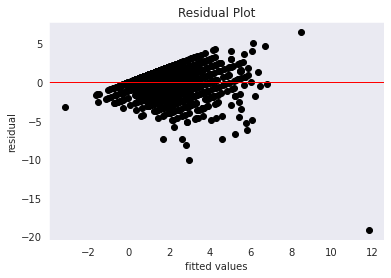

In [801]:
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

CROSS VALIDATION

In [ ]:
crossval = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean

print(f'The mean is {np.round(crossval.mean()*-1, 3)}')

# Calculating the standard deviation 

print(f'The standard deviation is {np.round(crossval.std(), 3)}')

Heteroskedasticity using Barlett's test

In [804]:
# Bartlett’s test is used to test if variances across samples is equal. It is sensitive to departures from normality

from scipy.stats import bartlett
import scipy as sp

residuals = np.subtract(y_pred, y_test)

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If test_result > critical value, the null hypothesis is rejected.

# Otherwise,null hypothesis is accepted since variances are homogenous.
if (test_result > critical_value):
  print(f'test result of {np.round(test_result,2)} > critical value of {np.round(critical_value, 2)}')
  print('variances are not equal')
else:
  print(f'test result of {np.round(test_result,2)} < critical value of {np.round(critical_value, 2)}')
  print('variances are equal making the model effective and reliable')


test result of 439.06 < critical value of inf
variances are equal making the model effective and reliable


since the variances are equal making the model effective and reliable
